In [2]:
#library declaration
import pandas as pd
import datetime
import pandas_datareader.data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Downloaing the data from internet 

In [3]:
#assign start and end dates
start_date=datetime(2015,1,1)
end_date=datetime(2021,9,9)
#populate the dataframe with data from the Yahoo Website
df = web.DataReader('AAPL', 'yahoo', start=start_date, end=end_date)


### Saving the data (df) in your local machine 

In [4]:
df.to_csv('./Data-CSVfiles/Name_file.csv')

### Uploading the data from your local folder onto jupyternoootbook

In [5]:
df=pd.read_csv('./Name_file.csv', index_col=0)

### Data Cleaning

In [6]:
df.isnull().values.any()

False

### Data visualization

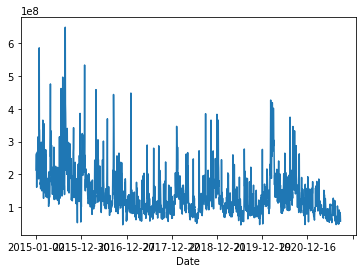

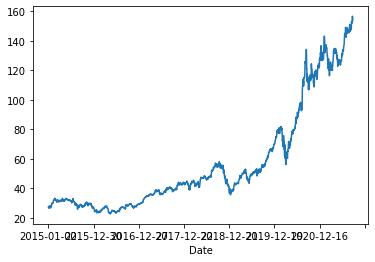

In [7]:
plot1 = plt.figure(1)
df["Volume"].plot()
plot2 = plt.figure(2)
df["Close"].plot()
plt.show()

### How to reset the index

In [8]:
df_reset = df.reset_index()

### Creating a new column with name DateNummeric

In [9]:
df_reset['DateNummeric'] = pd.to_datetime(df_reset['Date'])

### Using datetime function to convert Date into numerical values 

In [10]:
df_reset['DateNummeric']=df_reset['DateNummeric'].map(dt.datetime.toordinal)

### Selecting label and features for modeling 

In [11]:

X=df_reset["DateNummeric"].values.reshape(-1, 1)
Y=df["Close"].values

### Training the model 

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=.7,random_state=42)
model = LinearRegression() #create linear regression object
model.fit(X_train,Y_train) #train model on train data

LinearRegression()

### Model Accuracy 

In [13]:
accuracy=model.score(X_test,Y_test)

### One day predicton 

In [14]:
day = 1
X_future=np.array(X[-1:])+day
forecast_set=model.predict(X_future)
print(forecast_set)

[110.27537181]


## N-day prediction

#### Creating a cloumn for prediction with nan values

In [15]:
df["prediction"]=np.nan

##### Setting up last date and future date

In [16]:
N=30
last_date=pd.to_datetime(df.iloc[-1].name)
future_date= last_date+pd.DateOffset(days=N)

#### Creating data set for last date to final date

In [17]:
s=pd.date_range(last_date, future_date, freq='D').to_series()
d=s.dt.weekday
df_future = pd.DataFrame(data=d,columns=['days'])
df_future.index.name = 'Date'
df_future.drop(df_future.index[df_future['days'] == 0], inplace = True)
df_future.drop(df_future.index[df_future['days'] == 6], inplace = True)


#### Getting prediction data from our model

In [18]:

df_future_reset = df_future.reset_index()
df_future_reset['DateNummeric'] = pd.to_datetime(df_future_reset['Date'])
df_future_reset['DateNummeric']=df_future_reset['Date'].map(dt.datetime.toordinal)
X_future=df_future_reset["DateNummeric"].values.reshape(-1, 1)
forecast_set=model.predict(X_future)
df_future["prediction"]=forecast_set


#### Attaching future prediction with original data set

In [19]:
df_future["Close"] = np.nan 
df_past= df[["Close","prediction"]]
result = pd.concat([df_past,df_future])

In [29]:
result=result.tail(100)

#### plotting the result

<AxesSubplot:xlabel='Date'>

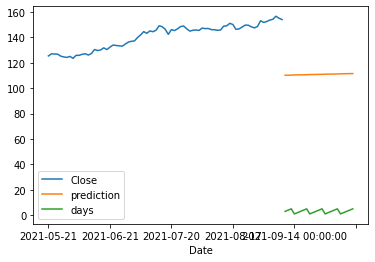

In [30]:
result.plot()